In [1]:
import os
os.chdir('../../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r3/title_r3_2.5k.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                         )


Drug Target Interaction Prediction Mode...
in total: 2500 drug-target pairs
encoding drug...
unique drugs: 2465
encoding protein...
unique target sequence: 708
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 52.0253. Total time 0.0 hours
Validation at Epoch 1 with loss:4.95035, MSE: 4.95035 , Pearson Correlation: 0.10677 with p-value: 9.21E-02 , Concordance Index: 0.54005
Training at Epoch 2 iteration 0 with loss 5.33763. Total time 0.00111 hours
Validation at Epoch 2 with loss:5.88070, MSE: 5.88070 , Pearson Correlation: 0.11805 with p-value: 6.24E-02 , Concordance Index: 0.53645
Training at Epoch 3 iteration 0 with loss 5.82235. Total time 0.00222 hours
Validation at Epoch 3 with loss:2.22186, MSE: 2.22186 , Pearson Correlation: 0.12181 with p-value: 5.44E-02 , Concordance Index: 0.53818
Training at Epoch 4 iteration 0 with loss 2.27808. Total time 0.00361 hours
Validation at Epoch 4 with loss:2.45021, MSE: 2.45021 , Pearson Correlation: 0.13460 with p-value: 3.34E-02 , Concordance Index: 0.54044
Training at Epoch 5 iteration 0 with loss 2.80553. Total time 0.00472 hours
Validation

Training at Epoch 39 iteration 0 with loss 1.58729. Total time 0.06777 hours
Validation at Epoch 39 with loss:1.88244, MSE: 1.88244 , Pearson Correlation: 0.41319 with p-value: 9.96E-12 , Concordance Index: 0.62852
Training at Epoch 40 iteration 0 with loss 1.43880. Total time 0.07055 hours
Validation at Epoch 40 with loss:1.86152, MSE: 1.86152 , Pearson Correlation: 0.42543 with p-value: 2.07E-12 , Concordance Index: 0.63177
Training at Epoch 41 iteration 0 with loss 1.25205. Total time 0.07333 hours
Validation at Epoch 41 with loss:1.80360, MSE: 1.80360 , Pearson Correlation: 0.43316 with p-value: 7.41E-13 , Concordance Index: 0.63560
Training at Epoch 42 iteration 0 with loss 1.10860. Total time 0.07611 hours
Validation at Epoch 42 with loss:2.12000, MSE: 2.12000 , Pearson Correlation: 0.42873 with p-value: 1.34E-12 , Concordance Index: 0.63402
Training at Epoch 43 iteration 0 with loss 1.57100. Total time 0.07888 hours
Validation at Epoch 43 with loss:1.78559, MSE: 1.78559 , Pearso

Validation at Epoch 77 with loss:2.14538, MSE: 2.14538 , Pearson Correlation: 0.45424 with p-value: 3.94E-14 , Concordance Index: 0.64875
Training at Epoch 78 iteration 0 with loss 0.20705. Total time 0.20333 hours
Validation at Epoch 78 with loss:2.04055, MSE: 2.04055 , Pearson Correlation: 0.45861 with p-value: 2.09E-14 , Concordance Index: 0.65287
Training at Epoch 79 iteration 0 with loss 0.14525. Total time 0.20666 hours
Validation at Epoch 79 with loss:2.09775, MSE: 2.09775 , Pearson Correlation: 0.45334 with p-value: 4.48E-14 , Concordance Index: 0.65119
Training at Epoch 80 iteration 0 with loss 0.18254. Total time 0.21055 hours
Validation at Epoch 80 with loss:2.07681, MSE: 2.07681 , Pearson Correlation: 0.45050 with p-value: 6.73E-14 , Concordance Index: 0.64888
Training at Epoch 81 iteration 0 with loss 0.21394. Total time 0.21416 hours
Validation at Epoch 81 with loss:2.03866, MSE: 2.03866 , Pearson Correlation: 0.44508 with p-value: 1.45E-13 , Concordance Index: 0.64528
Tr

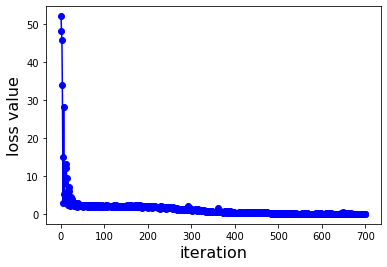

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./result/DeepDTA/r3/model_r3_2.5k_100epochs')